In [ ]:
import pandas as pd

In [ ]:
!wget -P /content/drive/MyDrive/LaMiaCartellaDataset https://sapienza2023adm.s3.eu-south-1.amazonaws.com/lighter_authors.json

--2023-10-29 11:57:24--  https://sapienza2023adm.s3.eu-south-1.amazonaws.com/lighter_authors.json
Resolving sapienza2023adm.s3.eu-south-1.amazonaws.com (sapienza2023adm.s3.eu-south-1.amazonaws.com)... 52.95.151.8, 52.95.151.30
Connecting to sapienza2023adm.s3.eu-south-1.amazonaws.com (sapienza2023adm.s3.eu-south-1.amazonaws.com)|52.95.151.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 549013002 (524M) [application/json]
Saving to: ‘/content/drive/MyDrive/LaMiaCartellaDataset/lighter_authors.json’

lighter_authors.jso 100%[===================>] 523.58M  30.6MB/s    in 18s     

2023-10-29 11:57:43 (28.3 MB/s) - ‘/content/drive/MyDrive/LaMiaCartellaDataset/lighter_authors.json’ saved [549013002/549013002]



In [ ]:
filename0 = "/content/drive/MyDrive/LaMiaCartellaDataset/lighter_authors.json"

In [ ]:
# Read the data
df_chunks = pd.read_json(filename0, lines=True, dtype={'ratings_count': 'int32', 'text_reviews_count':'int32', 'works_count':'int32', 'id':'int32', 'fans_count':'int32', 'name':'string', 'gender':'string', 'image_url':'string', 'average_rating':'float16', 'about':'string'}, chunksize=10000)
#E' UN ITERATORE CHE MI LEGGE I DATI A BLOCCHI

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Loop through each chunk and append it to the result DataFrame
for chunk in df_chunks:
    df = pd.concat([df, chunk], ignore_index=True)

In [ ]:
df.columns

Index(['ratings_count', 'average_rating', 'text_reviews_count', 'work_ids',
       'book_ids', 'works_count', 'id', 'name', 'gender', 'image_url', 'about',
       'fans_count'],
      dtype='object')

In [ ]:
df.info() #35mila x 12

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351767 non-null  int32  
 1   average_rating      351767 non-null  float16
 2   text_reviews_count  351767 non-null  int32  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int32  
 6   id                  351767 non-null  int32  
 7   name                351767 non-null  string 
 8   gender              351767 non-null  string 
 9   image_url           351767 non-null  string 
 10  about               351767 non-null  string 
 11  fans_count          351767 non-null  int32  
dtypes: float16(1), int32(5), object(2), string(4)
memory usage: 23.5+ MB


In [ ]:
!wget -P /content/drive/MyDrive/LaMiaCartellaDataset https://sapienza2023adm.s3.eu-south-1.amazonaws.com/lighter_books.json

--2023-10-30 18:21:45--  https://sapienza2023adm.s3.eu-south-1.amazonaws.com/lighter_books.json
Resolving sapienza2023adm.s3.eu-south-1.amazonaws.com (sapienza2023adm.s3.eu-south-1.amazonaws.com)... 52.95.152.46, 52.95.153.30
Connecting to sapienza2023adm.s3.eu-south-1.amazonaws.com (sapienza2023adm.s3.eu-south-1.amazonaws.com)|52.95.152.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16123393395 (15G) [application/json]
Saving to: ‘/content/drive/MyDrive/LaMiaCartellaDataset/lighter_books.json’

lighter_books.json  100%[===================>]  15.02G  24.0MB/s    in 13m 7s  

2023-10-30 18:34:54 (19.5 MB/s) - ‘/content/drive/MyDrive/LaMiaCartellaDataset/lighter_books.json’ saved [16123393395/16123393395]



In [ ]:
filename1 = "/content/drive/MyDrive/LaMiaCartellaDataset/lighter_books.json"
import pandas as pd

In [ ]:
d = pd.read_json(filename1, lines=True, nrows=10)
print(d.columns)

Index(['id', 'title', 'authors', 'author_name', 'author_id', 'work_id', 'isbn',
       'isbn13', 'asin', 'language', 'average_rating', 'rating_dist',
       'ratings_count', 'text_reviews_count', 'publication_date',
       'original_publication_date', 'format', 'edition_information',
       'image_url', 'publisher', 'num_pages', 'series_id', 'series_name',
       'series_position', 'shelves', 'description'],
      dtype='object')


In [ ]:
# Read the data
df_chunks = pd.read_json(filename1, lines=True, chunksize=200000)

# Create an empty DataFrame to store the results
df1 = pd.DataFrame()

# Loop through each chunk and append it to the result DataFrame
for chunk in df_chunks:
  chunk = chunk[['id', 'title', 'original_publication_date', 'num_pages', 'series_id',
                 'series_name', 'author_name', 'author_id', 'average_rating', 'format',
                 'rating_dist', 'ratings_count', 'text_reviews_count']]
  df1 = pd.concat([df1, chunk], ignore_index=True) #7027431

In [ ]:
df1['rating_dist'][:10]
df1['rating_dist'][:10]

0    5:1674064|4:664833|3:231195|2:41699|1:16215|to...
1    5:4801606|4:1681521|3:623286|2:145898|1:125040...
2    5:1690166|4:781011|3:313727|2:54687|1:15453|to...
3    5:1994597|4:696545|3:212678|2:28915|1:13959|to...
4    5:1808039|4:663849|3:193604|2:27759|1:12425|to...
5        5:25063|4:4467|3:1103|2:227|1:282|total:31142
6        5:49438|4:6112|3:1525|2:354|1:534|total:57963
7        5:25063|4:4467|3:1103|2:227|1:282|total:31142
8    5:753962|4:436665|3:206876|2:60681|1:32955|tot...
9    5:167705|4:81013|3:32283|2:8665|1:4360|total:2...
Name: rating_dist, dtype: object

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#We create two different lists, date with the entire original publication date in tuples, and date_y with just the year.
#The problem is that for some books the month is missing.
date = []
date_y=[]
date_m=[]
for i in df1['original_publication_date']:
  dd=tuple(i.split('-'))
  date.append(dd)
  date_y.append(i.split('-')[0])

  #Some books don't have the specified month of publication date, but just the year.
  #So we create a list for the months and when it is not specified we insert 0.
  if len(i.split('-'))>1:
    date_m.append(i.split('-')[1])
  else:
    date_m.append(0)

date_y = ['0' if i=='' else i for i in date_y]
date_y = [int(i) for i in date_y]
date_m = [int(i) for i in date_m]

#We add the column with the years and the months
df1['publication_year']=date_y
df1['publication_month']=date_m
#print((df1['publication_year']==0).sum())

In [ ]:
#PUNTO 3
import pandas as pd
from statistics import mode

def info_year(year):
  books = df1[df1['publication_year']==year]

  #The number of books published that year:
  published_b = len(books.index)

  #The total number of pages written that year:
  books['num_pages']= books['num_pages'].replace('', '0')
  books['num_pages']= books['num_pages'].astype(int)
  num_pages = books['num_pages'].sum()

  #The most prolific month of that year:
  months = books['publication_month']
  months_small = []
  for i in months: #Eliminating the 0 that are the unspecified months
    while i!=0:
      months_small.append(i)
      break
  if months_small:
    frequent_month = mode(months_small)
  else: #In the case this list is empty, it means that the months were all 0 (not specified)
    frequent_month ="There isn't enough information to find the most prolific month of this year"

  #The longest book written that year:
  index_max = books['num_pages'].idxmax() #Estracting the index of the maximum
  longest_b = books.loc[index_max, 'title']


  return(published_b, num_pages, frequent_month, longest_b)

#res=info_year(2003) #FUNZIONA però da SettingWithCopyWarning
#print("Le info dell'anno 2003 sono: ", res)


In [ ]:
from numpy import NaN
#Use this function to build your data frame: the primary key will be a year,
#and the required information will be the attributes within the row.
#Finally, show the head and the tail of this new data frame considering the
#first ten years registered and the last ten years.

years = df1['publication_year'].unique() #years is the primary key
list_years = []
for i in years:
  if i!=0 and i<2024:
    info = info_year(i)
    list_years.append([i] + list(info))

df_years = pd.DataFrame(list_years, columns = ['years', 'published_book', 'num_pages', 'frequent_month', 'longest_book'])
print('First ten years registered:')
print(df_years.head(10))
print('\nLast ten years registered:')
print(df_years.tail(10))

#OK VA BENE

<ipython-input-43-f7badb96595c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['num_pages']= books['num_pages'].replace('', '0')
<ipython-input-43-f7badb96595c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['num_pages']= books['num_pages'].astype(int)


First ten years registered:
   years  published_book   num_pages frequent_month  \
0   2003          146590    24187956              1   
1   1997          100289  2166944120              1   
2   1998          107045    18121729              1   
3   1999          114031    19759525              1   
4   2000          126668  2168781641              1   
5   2005          169033    27633904              1   
6   1979           32522     5351513              1   
7   1996           92695    15808512              1   
8   2002          133797    22688262              1   
9   1984           43562     7124459              1   

                                        longest_book  
0  21st Century Complete Guide To The National Se...  
1                                  שלושה סיפורי אהבה  
2                                         Prealgebra  
3  Theological and Miscellaneous Works of Joseph ...  
4                                     Dentes Brancos  
5  A Practical Guide to Linux Comman

In [ ]:
#Soluzione di CHATGPT (2)
import pandas as pd

# Assuming you have two DataFrames 'df' and 'df1' as you described
# Extract the year from the 'original_publication_date' column in df1
df1['publication_year'] = pd.to_datetime(df1['original_publication_date'], errors='coerce').dt.year

# Define a function to get information for a specific year
def get_yearly_info(year):
    select_books = df1[df1['publication_year'] == year]

    # The number of books published that year
    published_books = len(select_books)

    # The total number of pages written that year
    select_books['num_pages'] = pd.to_numeric(select_books['num_pages'], errors='coerce')
    total_pages = select_books['num_pages'].sum()

    # The most prolific month of that year
    most_prolific_month = select_books['original_publication_date'].str.split('-', expand=True)[1].mode().values[0]

    # The longest book written that year
    longest_book = select_books.loc[select_books['num_pages'].idxmax()]['title']

    return [published_books, total_pages, most_prolific_month, longest_book]

# Create a DataFrame for the required information
years = list(range(1990, 2023))  # Assuming you have data from 1990 to 2022
data = []

for year in years:
    info = get_yearly_info(year)
    data.append(info)

columns = ['Books Published', 'Total Pages', 'Most Prolific Month', 'Longest Book']
yearly_info_df = pd.DataFrame(data, index=years, columns=columns)

# Display the head and tail of the DataFrame
print("Head of the DataFrame:")
print(yearly_info_df.head(10))

print("\nTail of the DataFrame:")
print(yearly_info_df.tail(10))


#This solution of CHATGPT works. The output is different for some books because
#CHATGPT assumes that the range of the years is from 1990 to 2023 (in our
#solution we assume that the years is maximum 2023, but a book can be published
#also before 1990).
#To prove this solution we just described to CHATGPT the structure of the dataset
#of the authors, specifying that the 'original_publication_date' is sometimes
#incomplete (for this reason it uses errors='coerce'), and then we run the code.
#It gives a SettingWithCopyWarning because it is modifying a column of the Dataframe
#and this can bring changes to the original data.

<ipython-input-38-9559388ad2f7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_books['num_pages'] = pd.to_numeric(select_books['num_pages'], errors='coerce')
<ipython-input-38-9559388ad2f7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_books['num_pages'] = pd.to_numeric(select_books['num_pages'], errors='coerce')
<ipython-input-38-9559388ad2f7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Head of the DataFrame:
      Books Published   Total Pages Most Prolific Month  \
1990            61655  1.055410e+07                  01   
1991            65571  1.136554e+07                  01   
1992            70826  1.226798e+07                  01   
1993            73965  1.294439e+07                  01   
1994            79082  1.348162e+07                  01   
1995            86212  1.468196e+07                  01   
1996            92696  1.580852e+07                  01   
1997           100289  2.166944e+09                  01   
1998           107046  1.812173e+07                  01   
1999           114032  1.975968e+07                  01   

                                           Longest Book  
1990  The New International Commentary on the Old Te...  
1991           The New American Commentary Series (NAC)  
1992             Paperbound Books in Print, Spring 1992  
1993                     En grusom kvinnes bekjennelser  
1994    Richard Wright: A Collection 

<ipython-input-38-9559388ad2f7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_books['num_pages'] = pd.to_numeric(select_books['num_pages'], errors='coerce')
<ipython-input-38-9559388ad2f7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_books['num_pages'] = pd.to_numeric(select_books['num_pages'], errors='coerce')
<ipython-input-38-9559388ad2f7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [ ]:
from numpy.lib.function_base import digitize
#PUNTO 4

#You should be sure there are no eponymous (different authors who have precisely
#the same name) in the author's dataset. Is it true?
duplicates= list(df['name'].duplicated())
if len(duplicates) !=0:
  print("It's true, there are no eponymous authors")
else:
  print("It's not true, there are eponymous authors")

#Write a function that, given a list of author_id, outputs a dictionary where
#each author_id is a key, and the related value is a list with the names of all
#the books the author has written.
id_authors=list(df['id'])
def books_dict(author_id, dataframe):
  diz = dict()
  for i in id_authors:
    author_books = dataframe[dataframe['author_id']==i]
    titles= list(author_books['title'])
    diz[i]=titles

  return(diz)

#What is the longest book title among the books of the top 20 authors regarding
#their average rating? Is it the longest book title overall?
authors_total = df[['average_rating', 'id','name']]
authors_total = authors_total.sort_values(by='average_rating', ascending=False)
authors_20top = authors_total[:20] #Find the top 20 authors
diz_20top = books_dict(authors_20top['id'], df1)

max_t=0
for id, titles in diz_20top.items():
  for i in titles:
    if len(i) > max_t:
      max_t=len(i)
      longest_book=i
print("\nThe longest book title among the books of the top 20 authors regarding their average rating is:\n", longest_book)

diz_total = books_dict(id_authors, df1)
max_all=0
for id, titles in diz_total.items():
  for i in titles:
    if len(i) > max_all:
      max_all=len(i)
      longest_all=i

if longest_all==longest_book:
  print("It is the longest book title overall.")
else:
  print("It is not the longest book title overall.") #FINO A QUI FUNZIONA, OK!

#What is the shortest overall book title in the dataset? If you find something
#strange, provide a comment on what happened and an alternative answer.
min_all=float('inf')
for id, titles in diz_total.items():
  for i in titles:
    if len(i) < min_all:
      min_all=len(i)
      shortest_all=i
if shortest_all != None:
  print("The shortest overall book title is: ", min_all)
else:
  print("There is something strange, the shortest book has 0 pages")

#DA RUNNARE E VEDERE SE C'è QUALCOSA DI STRANO

It's true, there are no eponymous authors

The longest book title among the books of the top 20 authors regarding their average rating is:
 Educating the Royal Navy: 18th and 19th Century Education for Officers (Cass Series: Naval Policy and History)
It is not the longest book title overall


TypeError: ignored

The top 10 most influential authors are:
 1017             Stephen King
1161          James Patterson
27110         Cassandra Clare
4537             Rick Riordan
169374          Veronica Roth
205870         Colleen Hoover
100166             John Green
3818      Neil deGrasse Tyson
32358            Mindy Kaling
6397              Bill  Gates
Name: name, dtype: string
The most influential author is:  Stephen King

There isn't a longest serie name.

There is  1  author with different formats publications



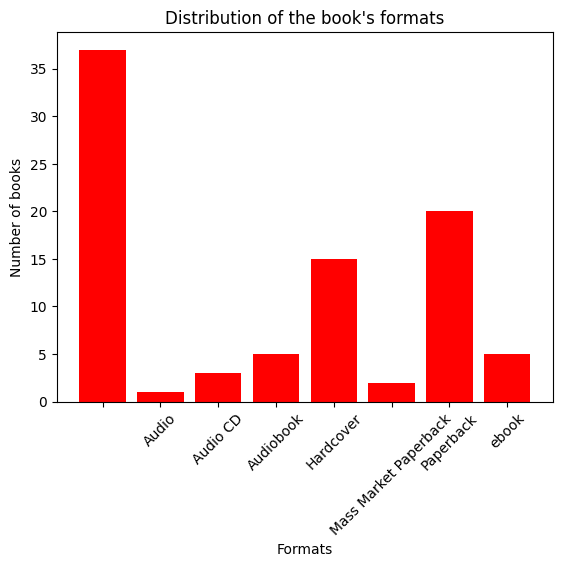

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#PUNTO 5
#Plot the top 10 most influential authors regarding their fan count and number
#of books. Who is the most influential author?

#AUTHORS: Index(['ratings_count', 'average_rating', 'text_reviews_count', 'work_ids',
       #'book_ids', 'works_count', 'id', 'name', 'gender', 'image_url', 'about',
       #'fans_count']

#Ordering by fan count
authors_influential = df.sort_values(by = 'fans_count', ascending = False)
authors_influential = authors_influential[:10]
#Ordering by number of books
authors_influential = authors_influential.sort_values(by = 'works_count', ascending = False)
print("The top 10 most influential authors are:\n", authors_influential['name'])

most_influent = authors_influential.iloc[0]
print("The most influential author is: ", most_influent['name'])

#Have they published any series of books? If any, extract the longest series
#name among these authors.

#Index(['id', 'title', 'authors', 'author_name', 'author_id', 'work_id', 'isbn',
      # 'isbn13', 'asin', 'language', 'average_rating', 'rating_dist',
      # 'ratings_count', 'text_reviews_count', 'publication_date',
      # 'original_publication_date', 'format', 'edition_information',
      # 'image_url', 'publisher', 'num_pages', 'series_id', 'series_name',
      # 'series_position', 'shelves', 'description']
names_influent= authors_influential['name']
for i in names_influent:
  influent = df1[df1['author_name']==i]

max=0
longest_series_name=None #in the case there isn't a serie name
names_series= influent['series_name']
for j in names_series:
  if len(j) > max:
    max=len(j)
    longest_series_name = i
if longest_series_name != None:
  print("\nThe longest series name is: ", longest_series_name)
else:
  print("\nThere isn't a longest serie name.")

#How many of these authors have been published in different formats?
#Provide a meaningful chart on the distribution of the formats and comment on it.

#First we create a dictionary with the author name as the key and the formats as the elements for each one.
def format_dict(author_name, dataframe):
  diz = dict()
  for i in names_influent:
    influent_10 = dataframe[dataframe['author_name']==i]
    formats= list(influent_10['format'])
    diz[i]=formats

  return(diz)

diz_format=format_dict(influent['author_name'], influent)

#Then we see if there are duplicates in the format.
count=0
for i in diz_format.values():
  if len(set(i)) != len(i):
    count += 1
if count==0:
  print("\nThere are no author with different formats publications.\n")
if count==1:
  print("\nThere is ", count, " author with different formats publications.\n")
else:
  print("\nThere are ", count, " author with different formats publications.\n")

#Histogram
#All the formats in a list
formats_all = [i for j in diz_format.values() for i in j]
#Creating a dictionary that connets the formats to their index
unique_form = np.unique(formats_all)
diz_form_index = {} #creating a dictionary with all the formats and the corrispondent index
for index, format in enumerate(unique_form):
  diz_form_index[format]=index
#Converting the formats in numeric indexes
formats_numbers = [diz_form_index[i] for i in formats_all]
#Calculating the histogram
hist, bin_edges = np.histogram(formats_numbers, bins=np.arange(len(unique_form)+1))
#Bar chart
plt.bar(unique_form, hist, color='red')
plt.xlabel('Formats')
plt.ylabel('Number of books')
plt.title("Distribution of the book's formats")
plt.xticks(rotation=45)  #Ruotating every name of the bars of 45°
plt.show() #DA RICONTROLLARE PERCHè ALCUNE BARRE NON HANNO NOME

#Provide information about the general response from readers (number of fans,
#average rating, number of reviews, etc.), divide the authors by gender, and
#comment about anything eventually related to “structural bias.”
## ???????????????????????????????

#Faccio una tabella printando le info per ogni autore. Poi confronto tra i generi
#vedo se c'è differenza tra uomo-donna.
info_influent = authors_influential[['average_rating', 'ratings_count', 'text_reviews_count',
                    'fans_count', 'gender']]
df_influent = pd.DataFrame(info_influent)
print(df_influent)
#MANCA IL COMMENTO IN BASE AI DATI: #m, f, queer, altro --> le 4 categorie
#relazione tra average rating e sesso
#anche con fans count
#text reviews

In [ ]:
# PUNTO 6

# Devo trovare la media del tempo tra due pubblicazioni successive per ogni autore
# sia nella serie sia per i libri non appartenenti alla serie.
#Faccio due medie.
#Considero gli anni.
#Sort degli anni di pubblicazione per ogni autore, così poi calcolo le differenze
#tra una pubblicazione e un'altra e faccio la media delle differenze.

#In media mi aspetto di vedere che un autore pubblica ogni due anni tipo.


#Provide the average time gap between two subsequent publications for a series
#of books and those not belonging to a series. What do you expect to see,
#and what is the actual answer to this question?
def average_time(names_influent, influent_df):
  gap_serie=[]
  gap_not_serie=[]

  for i in names_influent:
    series = influent_df[influent_df['series_name'].notna()] #capire se va bene dividerli così però....
    not_series = influent_df[influent_df['series_name'].isna()]

    if not series.empty:
      gap_serie = series['publication_date'].diff().mean()
      gap.append(gap_serie)

    if not not_series.empty:
      gap_not_serie = not_series['publication_date'].diff().mean()
      gap_not_serie.append(gap_not_serie)

  print('Average time gap (serie)': sum(gap_serie, pd.Timedelta()) / len(gap_serie))
  print('Average time gap (not serie)': sum(gap_not_serie, pd.Timedelta()) / len(gap_not_serie))
  #DA SISTEMARE PERCHè PRESO DA CHATGPT

#For each of the authors, give a convenient plot showing how many books has
#the given author published UP TO a given year. Are these authors contemporary
#with each other? Can you notice a range of years where their production rate
#was higher?
        #UP TO a given year = FINO A un determinato anno
#First we create a dictionary with the author name as the key and the books as the elements for each one.
def books_influent_dict(author_name, given_year, dataframe):
  diz = dict()
  for i in names_influent:
    influent_10 = dataframe[dataframe['author_name']==i]
    if influent_10['publication_year'] <= given_year:
      books = list(influent_10['title'])
      diz[i]=books

  return(diz)

#devo fare attenzione a quando manca l'anno
def hist_uptoyear(year, influent_df):
  #publications_uptoyear = influent_df[influent_df['publication_year']<= year]
  diz_books_influent = books_influent_dict(names_influent, year, df1)
  #Creating a dictionary to count how many books there are for each author
  counts_dict = {}
  for i, j in diz_books_influent.items():    #NO PERCHè DEVO CONSIDERARE L'ANNO FINO A CUI VOGLIO FARE IL GRAFICO
    counts_dict[i]=len(j)
  #Transforming the dictionary into dataframe
  df_counts = pd.DataFrame(list(counts_dict.items()), columns=['author', 'number_of_books'])

  #Histogram
  df.plot.bar(x='author', y='number_of_books', legend=False)
  plt.title(f'Publication up to {year}')
  plt.xlabel('Author')
  plt.ylabel('Number of books')
  plt.show()
#DA VEDERE SE VA BENE, ANCHE FARE UNA FUNZIONE????


0


In [ ]:
#Index(['id', 'title', 'authors', 'author_name', 'author_id', 'work_id', 'isbn',
      # 'isbn13', 'asin', 'language', 'average_rating', 'rating_dist',
      # 'ratings_count', 'text_reviews_count', 'publication_date',
      # 'original_publication_date', 'format', 'edition_information',
      # 'image_url', 'publisher', 'num_pages', 'series_id', 'series_name',
      # 'series_position', 'shelves', 'description']

#PUNTO 7
#Estimate the probability that a book has over 30% of the ratings above 4.
#ratings_dist = (df1[['rating_dist']])
#.split('|')                                QUESTA PARTE FATTA SOTTO , CAPIRE COME PRENDERE I RATINGS PER 4 E 5
#ratings_dist = ratings_dist.str.split(':')
#ratings_dist=[int(i) for i in ratings_dist]
ratings_dist_over4 = ratings_dist[:4]

count_over4=0
list_over4=[]
for i in ratings_dist_over4:
  count_over4 = count_over4 + i[1] + i[3]
  list_over4.append(count_over4)

counts_tot=0
list_tot=[]
for i in ratings_dist:
  count_tot = count_tot + i[1] + i[3] + i[5] + i[7] + i[9]
  list_tot.append(count_tot)

prob_list=[]
for i in list_over4:
  for j in list_tot:
    prob_k = (i/j)*100
    prob_list.append(prob_k)

k_over30 = 0
for i in prob_list:
  if i>=30:
    k_over30 = k_over30 + 1

prob_final = k_over30 / len(prob_list)
print("The probability that a book has over 30% of the ratings above 4 is: ", prob_final)

#Estimate the probability that an author publishes a new book within two years
#from its last work.


AttributeError: ignored

In [ ]:
ratings_dist = df1['rating_dist'].tolist()
ratings_list=[]
for i in ratings_dist:
  k = i.split('|')
  ratings_list.append(k)

#print(ratings_list[:10])
ratings_list2 = [[i.split(':') for i in j] for j in ratings_list]
#print(ratings_list2[:10])

#Transforming into dataframe
df_ratings = pd.DataFrame(ratings_list2)
#print(df_ratings[:10])